# Extração de dados de digitalização de dados de funções em imagens - Relatório 1

   Foram realizadas pesquisas sobre como extrair pontos de uma função a partir de imagem utilizando R ou Python. A partir dessa busca inicial, os resultados indicavam que era necessário um processamento de imagem, para que posteriormente os algoritmos consequissem identificar os pixels da função. 
   Dois caminhos utilizando o R foram encontrados, o primeiro faz-se necessário a utilização do pacote 'Magick' e 'Tidyverse', o outro é a partir do pacote 'Digitize'.

## Teste usando 'Magick' 

   Magick é um pacote que possibilita a extração de dados a partir de uma imagem. Após o tratamento da imagem, de acordo com as necessidades de saturação,luminosidade e matiz. Após a adequação da imagem é possível plotar o gráfico utilizando o ggplot2. 
   Para o teste utilizarei a seguinte imagem de uma linha feita a mão.

<img src="files/teste2.jpeg" width="200" height="100">

### Passo a passo:

Inicialmente é necessário instalar os pacotes necessários para essa metodologia.

In [ ]:
# Instalar os pacotes 'tidyverse' e 'magik' install.packages('magick', repos='http://cran.us.r-project.org') 
#install.packages('tidyverse', repos='http://cran.us.r-project.org')

Após a instalação dos pacotes, podemos dar continuidade ao procedimento:

In [2]:
# Ler a imagem usando o magick
library(tidyverse)
library(magick)
im <- image_read("teste2.jpeg")

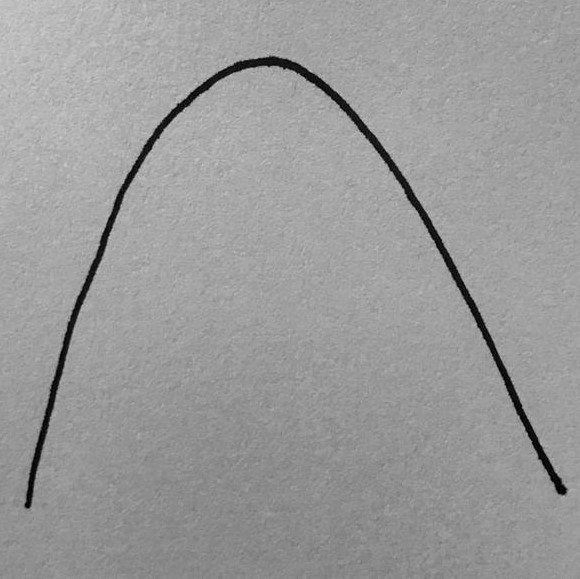

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     580    579 Gray       FALSE        0 96x96  

In [3]:
# Extrair 'saturation channel'
im_proc <- im %>% image_channel("saturation")
im_proc

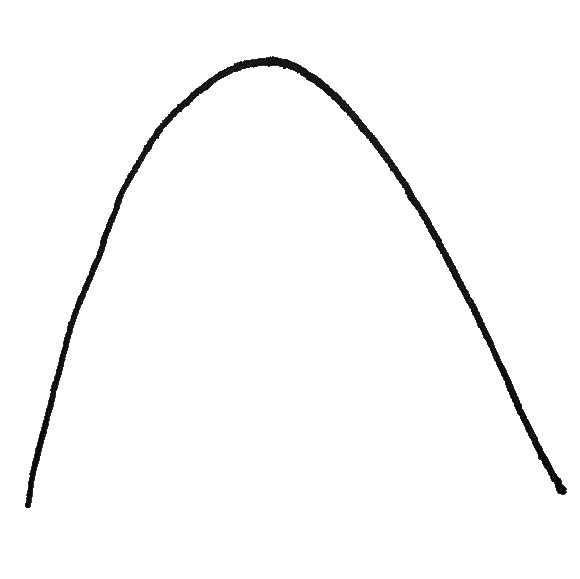

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     580    579 Gray       FALSE        0 96x96  

In [4]:
# Reprocessar a imagem para que os pixels com saturação<30% ficam brancos
im_proc2 <- im_proc %>% 
image_threshold("white", "30%")
im_proc2

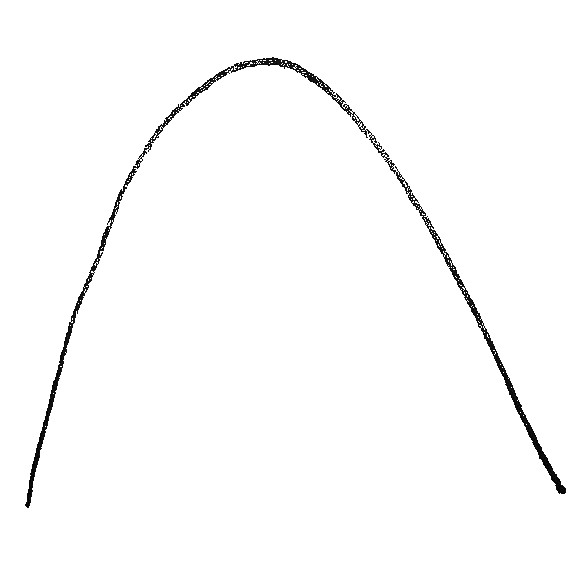

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     580    579 Gray       FALSE        0 96x96  

In [5]:
final_im <- im_proc2 %>% 
image_threshold("white", "10%")
final_im

Nessa etapa é necessário negativar a imagem para que as linhas fiquem brancas e o fundo preto, para que qualquer valor de pixel na imagem maior que 0 represente um ponto que será extraído.

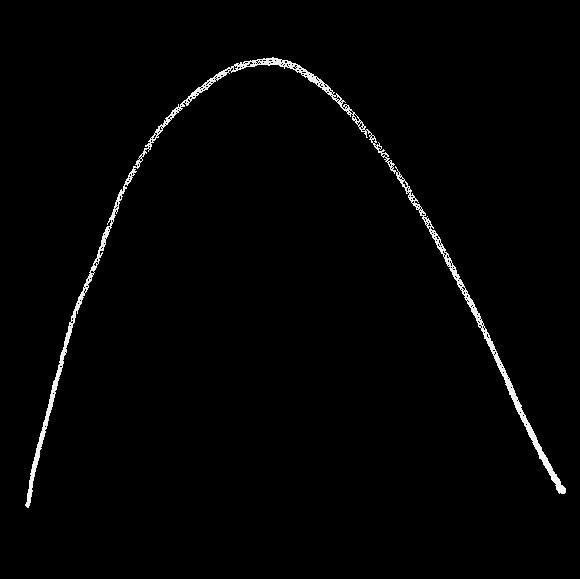

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     580    579 Gray       FALSE        0 96x96  

In [6]:
neg_final_im <- final_im %>% 
image_negate()
neg_final_im

In [7]:
dat <- image_data(neg_final_im)[1,,] %>%
  as.data.frame() %>%
  mutate(Row = 1:nrow(.)) %>%
  select(Row, everything()) %>%
  mutate_all(as.character) %>%
  gather(key = Column, value = value, 2:ncol(.)) %>%
  mutate(Column = as.numeric(gsub("V", "", Column)),
         Row = as.numeric(Row),
         value = ifelse(value == "00", NA, 1)) %>%
  filter(!is.na(value))
dat

Row,Column,value
<dbl>,<dbl>,<dbl>
273,58,1
274,58,1
264,59,1
265,59,1
267,59,1
268,59,1
269,59,1
270,59,1
271,59,1


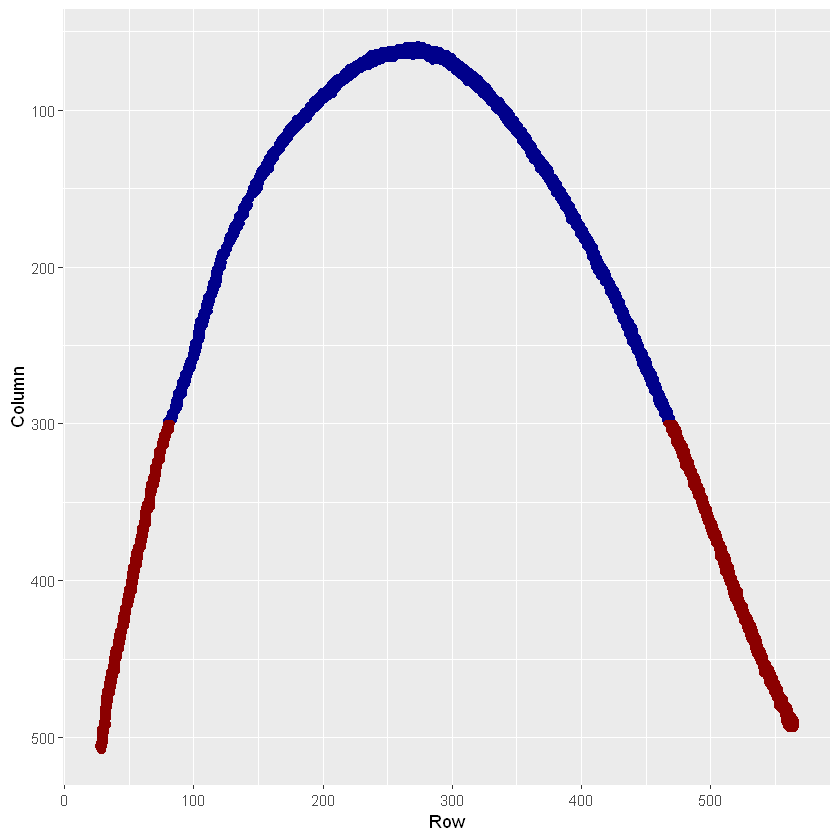

In [8]:
ggplot(data = dat, aes(x = Row, y = Column, colour = (Column < 300))) +
  geom_point() +
  scale_y_continuous(trans = "reverse") +
  scale_colour_manual(values = c("red4", "blue4")) +
  theme(legend.position = "off")

### Limitações

Um problema encontrado nesse método foi a dificuldade de encontrar um parâmetro para exclusão de pixels de acordo com a saturação. Há casos em que há pixels pertencentes ao gráfico da função com saturação baixa, então alguns acabam sumindo no processo. Por tanto, o percentil utilizado nesse caso não precisa ser seguido à risca, é preciso adaptar para cada situação.
